Data Frames - Empresa fíctica Contoso

In [24]:
# Import Pandas library
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Data Frames creation
products_df = pd.read_csv('Contoso - Cadastro Produtos.csv',sep=';')
customers_df = pd.read_csv('Contoso - Clientes.csv',sep=';')
stores_df = pd.read_csv('Contoso - Lojas.csv',sep=';')
promotions_df = pd.read_csv('Contoso - Promocoes.csv',sep=';')
sales_df = pd.read_csv('Contoso - Vendas - 2017.csv',sep=';')

In [26]:
# Data Information - Products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nome do Produto       1690 non-null   object
 1   Descricao do Produto  1690 non-null   object
 2   Fabricante            1690 non-null   object
 3   Nome da Marca         1690 non-null   object
 4   Tipo                  1690 non-null   object
 5   Custo Unitario        1690 non-null   object
 6   Preco Unitario        1690 non-null   object
 7   ID Produto            1690 non-null   int64 
 8   ID Subcategoria       1690 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 119.0+ KB


In [27]:
# Data Information - Clients
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39504 entries, 0 to 39503
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID Cliente          39504 non-null  int64  
 1   Primeiro Nome       39504 non-null  object 
 2   Sobrenome           39504 non-null  object 
 3   E-mail              39504 non-null  object 
 4   Genero              39504 non-null  object 
 5   Numero de Filhos    39504 non-null  int64  
 6   Data de Nascimento  39504 non-null  object 
 7   Unnamed: 7          0 non-null      float64
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          0 non-null      float64
 10  Unnamed: 10         0 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.3+ MB


In [28]:
# Data Information - Clients
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Loja                   306 non-null    int64  
 1   Nome da Loja              306 non-null    object 
 2   Quantidade Colaboradores  305 non-null    float64
 3   País                      306 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 9.7+ KB


In [29]:
# Data Information - Clients
promotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Promocao          28 non-null     int64  
 1   Nome Promocao        28 non-null     object 
 2   Percentual Desconto  28 non-null     object 
 3   Data Inicio          28 non-null     object 
 4   Data Termino         28 non-null     object 
 5   Unnamed: 5           0 non-null      float64
 6   Unnamed: 6           0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.7+ KB


In [30]:
# Data Information - Clients
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 74.8+ MB


In [31]:
# Remove Non useful columns in Data Frame Clients
customers_df = customers_df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1)

In [32]:
# Use only columns in Data Frame Clients
customers_df = customers_df[['ID Cliente','E-mail']]

In [33]:
# Remove Non useful columns in Data Frame Promotion
promotions_df = promotions_df.drop(['Unnamed: 5','Unnamed: 6'],axis=1)

In [34]:
# Use only columns in Data Frames Products and Stores
products_df = products_df[['ID Produto','Nome do Produto']]
stores_df = stores_df[['ID Loja','Nome da Loja']]

In [35]:
# Merge Data Frames
sales_df = sales_df.merge(products_df,on='ID Produto')
sales_df = sales_df.merge(stores_df,on='ID Loja')
sales_df = sales_df.merge(customers_df,on='ID Cliente')

In [36]:
# Rename one Column
sales_df = sales_df.rename(columns={'E-mail':'E-mail do Cliente'})

Which customer buy more often?

karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail do Cliente, Length: 38907, dtype: int64

<AxesSubplot:>

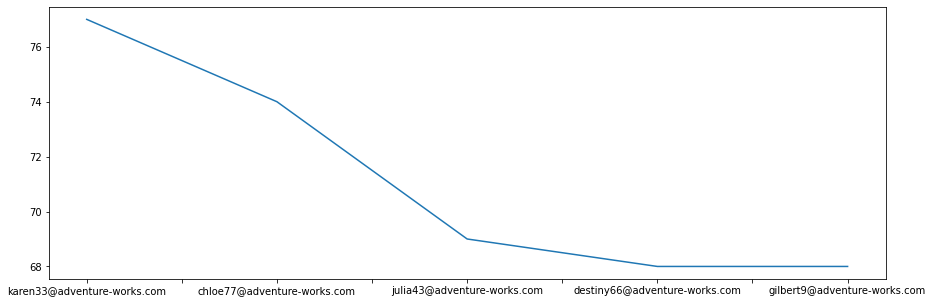

In [40]:
often_customers = sales_df['E-mail do Cliente'].value_counts()
display(often_customers)
often_customers[:5].plot(figsize=(15,5))